In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing Values per Column:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in    

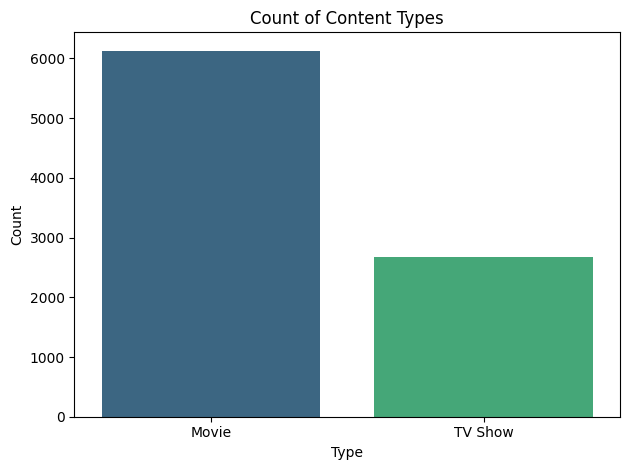

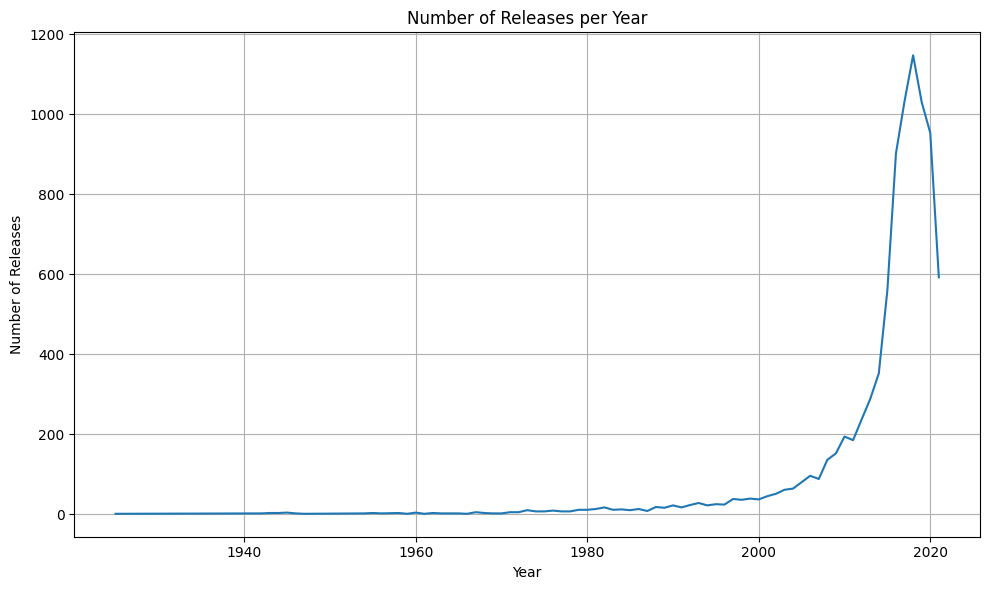

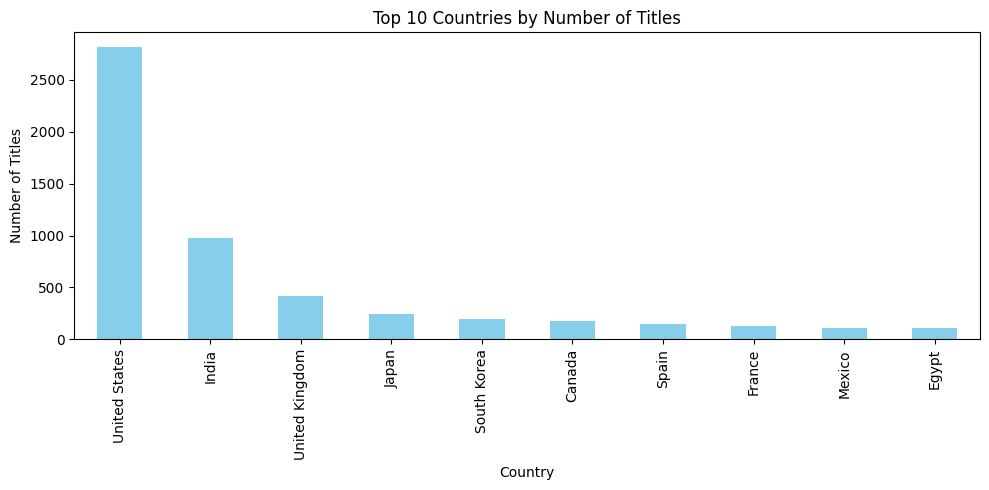

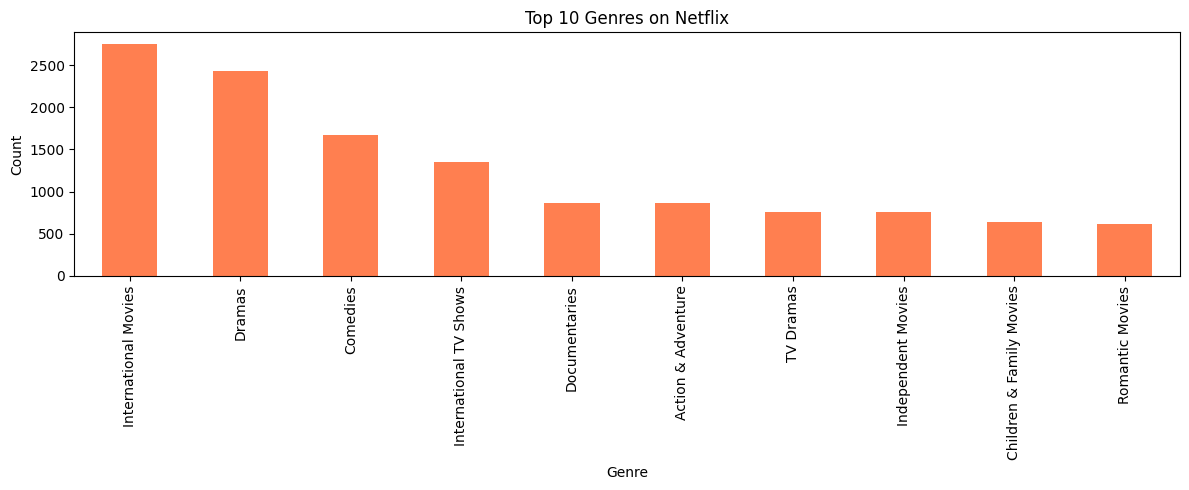

In [2]:
# Netflix Data Project - Exploratory Data Analysis (EDA)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("data.csv")

# Show basic info
df.info()

# Show number of missing values per column
missing = df.isnull().sum()
print("\nMissing Values per Column:\n", missing)

# Drop columns that are not useful for analysis
# Show ID is unique to each entry, Description is long text
clean_df = df.drop(columns=["show_id", "description"])

# Show most common types (TV Show or Movie)
sns.countplot(data=clean_df, x="type", hue="type", palette="viridis")
plt.title("Count of Content Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Convert release_year to numeric (if not already)
clean_df["release_year"] = pd.to_numeric(clean_df["release_year"], errors='coerce')

# Plot number of releases over years
plt.figure(figsize=(10,6))
clean_df["release_year"].value_counts().sort_index().plot()
plt.title("Number of Releases per Year")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.grid(True)
plt.tight_layout()
plt.show()

# Show top 10 countries with most titles
plt.figure(figsize=(10,5))
df["country"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

# Top 10 genres
plt.figure(figsize=(12,5))
genre_series = df['listed_in'].dropna().str.split(', ').explode()
genre_series.value_counts().head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Drop rows with missing values in required columns
model_df = df[['release_year', 'type', 'country', 'listed_in']].dropna()

# Limit to top 10 countries to reduce feature explosion
top_countries = model_df['country'].value_counts().head(10).index
model_df = model_df[model_df['country'].isin(top_countries)]

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(model_df[['type', 'country', 'listed_in']], drop_first=True)
y = model_df['release_year']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [5]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

In [6]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [8]:
def evaluate_model(name, y_true, y_pred):
    print(f"{name}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"  MAE:  {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"  R²:   {r2_score(y_true, y_pred):.4f}")
    print()

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Polynomial Regression", y_test, y_pred_poly)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)

Linear Regression
  RMSE: 8.62
  MAE:  5.14
  R²:   0.3080

Polynomial Regression
  RMSE: 8.48
  MAE:  5.06
  R²:   0.3309

Ridge Regression
  RMSE: 8.54
  MAE:  5.20
  R²:   0.3217



### Modeling Summary

We compared three regression models to predict the `release_year` of Netflix titles using encoded features like `type`, `country`, and `listed_in`.

- **Linear Regression**: RMSE = 8.62, R² = 0.3080
- **Polynomial Regression (Degree 2)**: RMSE = 8.48, R² = 0.3309
- **Ridge Regression**: RMSE = 8.54, R² = 0.3217

While all models performed similarly, **Polynomial Regression** had the lowest RMSE and the highest R², indicating a slightly better fit. However, Ridge Regression offered competitive results with the added benefit of regularization to reduce overfitting.